<a href="https://colab.research.google.com/github/ryangprince/TensorFlow-Bootcamp/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebooke we're going to learn how to write neural networks for classification prolems.

A classification problem is where you try to classify someething as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 100 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Out data is a little hard to understand right now... let's visualize it!

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


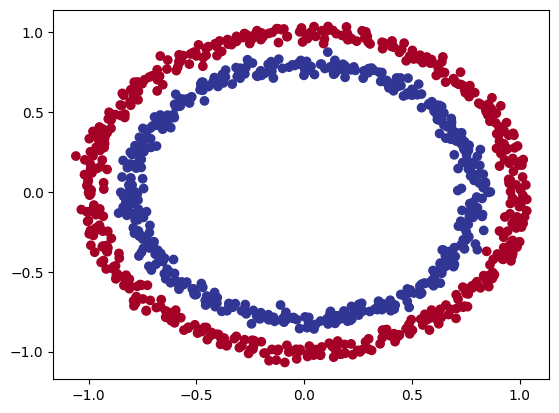

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [ ]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.18.0'

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4197 - loss: 4.4169
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4871 - loss: 0.7809
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4869 - loss: 0.7206
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4866 - loss: 0.7043
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4874 - loss: 0.6987


In [ ]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

# What was wrong here? We fit the model and evaluated it on the same data!
# We should have split the data between a training set and a test set.

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4852 - loss: 0.6927  


[0.6932879686355591, 0.4729999899864197]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5036 - loss: 0.6927


[0.6935070753097534, 0.48500001430511475]

In [ ]:
circles['label'].value_counts()

,count
label,
1,500
0,500


Our model is still just guessing and is very innacurate!

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might want to add more layers, or increase the number of hidden units within a layer.
2. Compiling a model - here we might want to choose a diffferent optimization function such as Adam instead of SGD.
3. Fitting a  - perhaps we ight fit our model for more epochs (leave it training for longer).

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5135 - loss: 0.6915


[0.6949039697647095, 0.4909999966621399]

We're still getting about 50% accuracy which no better than guessing!

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y).
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make prediction on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print('doing multiclass classification')
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot of the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


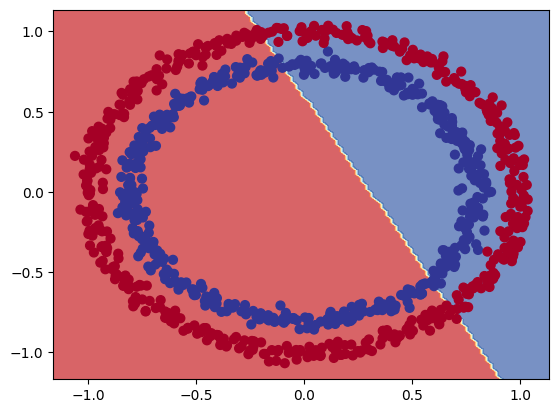

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model_3,
                       X=X,
                       y=y)

In [ ]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_2_1/Cast:0", shape=(None,), dtype=float32). Expected shape (None, 2), but input has incompatible shape (None,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None,), dtype=int32)
  • training=True
  • mask=None

Oh wait... we compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

We're changing the loss function to MSE instead of BinaryCrossentropy.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1, )), # since the data is one dimensional first layer needs one neuron and input_shape
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# 3. Fit the model
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 522.6659 - mae: 522.6659
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 478.6675 - mae: 478.6675
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 435.6629 - mae: 435.6629 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 391.2043 - mae: 391.2043 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 343.4702 - mae: 343.4702 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 291.2060 - mae: 291.2060
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 233.2014 - mae: 233.2014
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 168.2191 - mae: 168.2191 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 94.9521 - mae: 94.9521  
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 42.9453 - mae: 42.9453
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 65.7142 - mae: 65.7142
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 62.0511 - mae: 62.0511
Epoch 13/100
5/5 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


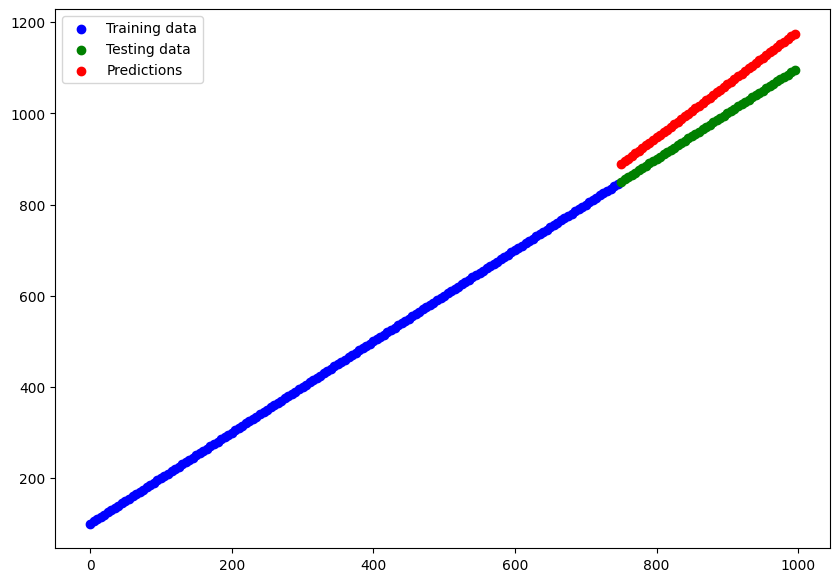

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend();

## The missing piece: Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss='binary_crossentropy', # normally use tf.keras.losses.BinaryCrossentropy()
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4585 - loss: 6.1269
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4569 - loss: 6.0857
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4547 - loss: 6.0138
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4561 - loss: 5.9681
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4533 - loss: 5.9542
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4533 - loss: 5.9519
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4533 - loss: 5.9508
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4534 - loss: 5.9364
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4556 - loss: 5.9113
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4556 - loss: 5.8719
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4544 - loss: 5.8740
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

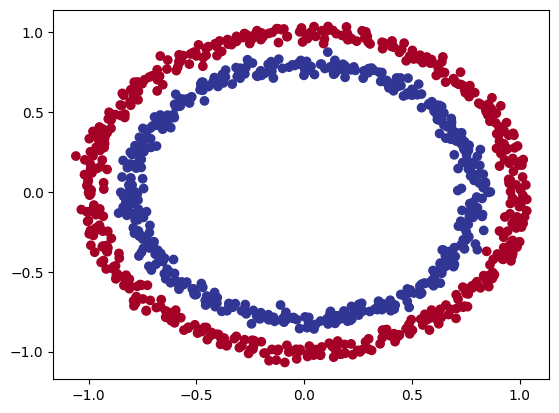

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


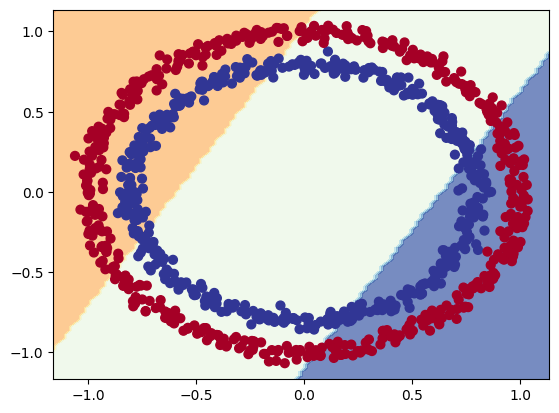

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

🛠 **Practice:** Before moving on try playing around in [TensorFlow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=2,2&seed=0.93799&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true&batchSize_hide=true). This let's you set the parameters and hyperparameters for a neural network and then visualize it's performance as it runs.

Let's try to build our first neural network with a non-linear activation function.

1. First let's try the ReLU function.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation (in this case ReLU)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu) # normally written: activation='relu'
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4459 - loss: 4.7010
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4261 - loss: 4.6097
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4106 - loss: 4.5914
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3903 - loss: 4.5796
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3840 - loss: 4.5654
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3857 - loss: 4.5299
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3863 - loss: 4.4956
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3876 - loss: 4.3879
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3881 - loss: 4.3322
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3880 - loss: 4.2598
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3937 - loss: 4.1108
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy:

Still not getting a good result!

**Exercise:** Now let's try adding more layer and more neurons, while keep everything else like the learning rate and activation function (ReLU) the same.

First, try it out in TensorFlow Playground, then try building these models in TensorFlow!

What worked?

* 3 layers, 4 neurons -> 2 neurons -> 1 neuron
 * epochs=1,523, Test loss 0.018, Training loss 0.010
* 3 layers, 4 neurons -> 4 neurons -> 1 neuron
 * epochs=1,423, Test loss 0.021, Training loss 0.005
 * Try running this model twice, increasing epochs from 100 to 200

In [ ]:
# Try 3 layers, 4 neurons -> 2 neurons -> 1 neuron
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_practice_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_practice_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                         metrics=['accuracy'])

# 3. Fit the model
history_practice_1 = model_practice_1.fit(X, y, epochs=100, verbose=0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


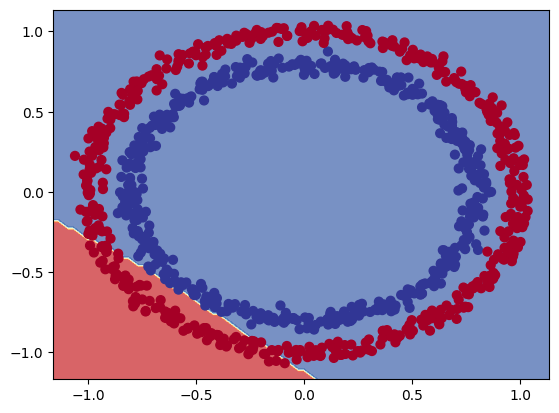

In [ ]:
# Check the decision boundary
plot_decision_boundary(model=model_practice_1,
                       X=X,
                       y=y)

Text(0.5, 0, 'epochs')

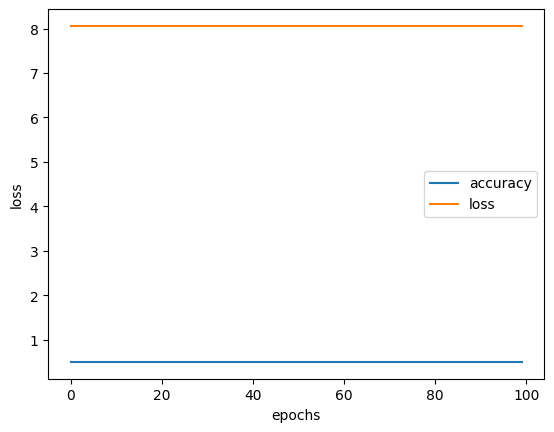

In [ ]:
# Plot the learning curve
pd.DataFrame(history_practice_1.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [ ]:
# Try 3 layers, 4 neurons -> 4 neurons -> 1 neuron
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_practice_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_practice_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                         metrics=['accuracy'])

# 3. Fit the model
history_practice_2 = model_practice_2.fit(X, y, epochs=100, verbose=0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


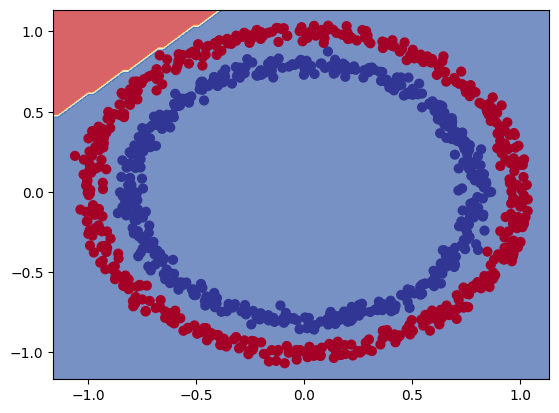

In [ ]:
# Plot the decision boundary
plot_decision_boundary(model=model_practice_2,
                       X=X,
                       y=y)

Text(0.5, 0, 'epochs')

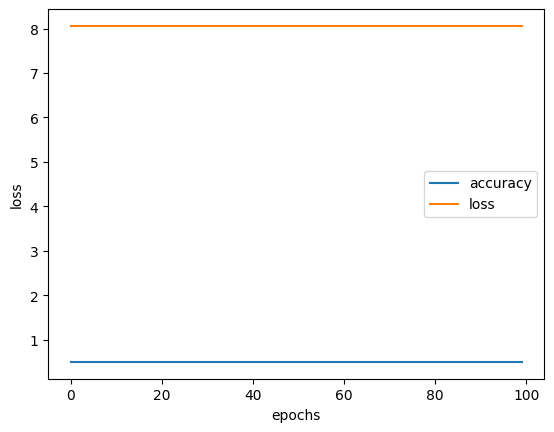

In [ ]:
# Plot the learning curve
pd.DataFrame(history_practice_2.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [ ]:
# Try 3 layers, 4 neurons -> 4 neurons -> 1 neuron and increase epochs to 200
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_practice_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_practice_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                         metrics=['accuracy'])

# 3. Fit the model
history_practice_3 = model_practice_3.fit(X, y, epochs=200, verbose=0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


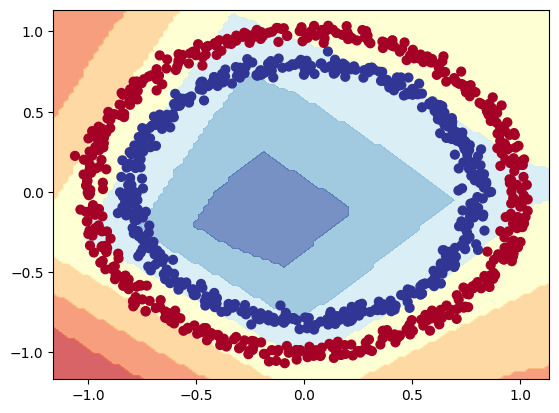

In [ ]:
# Plot the decision boundary
plot_decision_boundary(model=model_practice_3,
                       X=X,
                       y=y)

Text(0.5, 0, 'epochs')

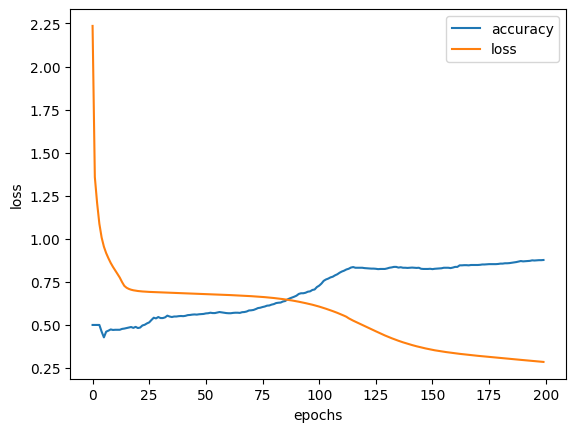

In [ ]:
# Plot the learning curve
pd.DataFrame(history_practice_3.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

Ok, now back to the course to see another way to handle this!

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 2/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 3/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 4/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 5/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 6/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 7/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 8/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 9/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 10/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 11/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 12/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [ ]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4955 - loss: 8.1322


[8.059046745300293, 0.5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
doing binary classification


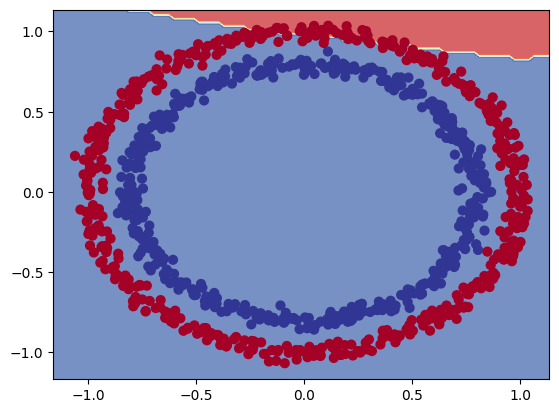

In [ ]:
# How do our model predictions look
plot_decision_boundary(model=model_6, X=X, y=y)

The model in the video isn't doing as well as mine is, *BUT*, there is one other update we can make to the model that is standard when doing binary classification: the **sigmoid** function!

**Exercise:** Before continuing with the video, try to create a model like model_6 but now set the activation function of the output neuron to be `'sigmoid'`.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_7.fit(X, y, epochs=150) # in the video there were 100 epochs, but my results are much worse so I increased it to 150 epochs

Epoch 1/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5179 - loss: 0.6936
Epoch 2/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5110 - loss: 0.6928
Epoch 3/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5108 - loss: 0.6923
Epoch 4/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5106 - loss: 0.6917
Epoch 5/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5167 - loss: 0.6912
Epoch 6/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5291 - loss: 0.6906
Epoch 7/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5185 - loss: 0.6900
Epoch 8/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5271 - loss: 0.6895
Epoch 9/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5210 - loss: 0.6888
Epoch 10/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5210 - loss: 0.6882
Epoch 11/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5208 - loss: 0.6875
Epoch 12/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

Very strange, so when I set my model up to run for 100 epochs I can't get the accuracy over 0.90, but when I increase the number of epochs to 200 or 150, the accuracy reaches 0.90 or greater at or before 100 epochs! So weird 🤔

In [ ]:
# 4. Evaluate our model
model_7.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9979 - loss: 0.1049


[0.10337069630622864, 0.996999979019165]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
doing binary classification


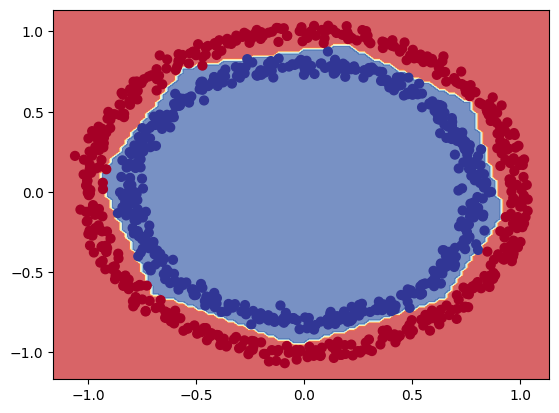

In [ ]:
# Let's visualize our incredible metrics
plot_decision_boundary(model=model_7, X=X, y=y)

🤔 **Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on, and what data did we predict on?

🔑 **Note:** the combination of **linear (straight lines) and non-linear (non_straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [ ]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

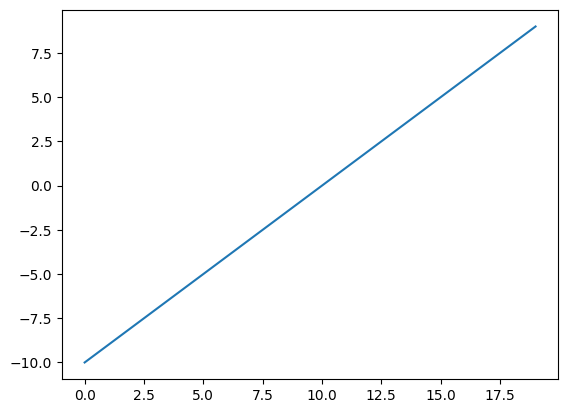

In [ ]:
# Visualize our toy tensor
plt.plot(A)

In [ ]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

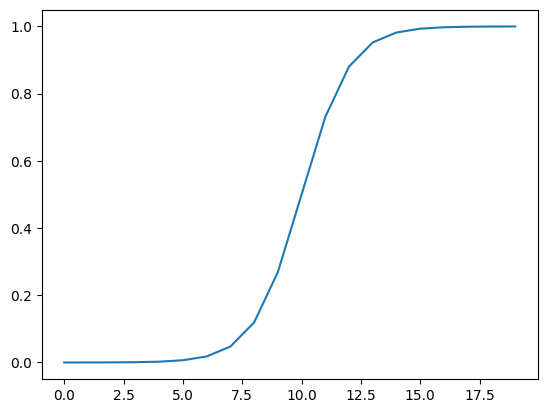

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

The line was originally straight (original values of toy tensor A), and now all values on the y axis is betweeen 0 and 1 and line is curved (sigmoid values of toy tensor A).

In [ ]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

The ReLU function has turned all negative numbers to zero, the positive numbers are unchanged.

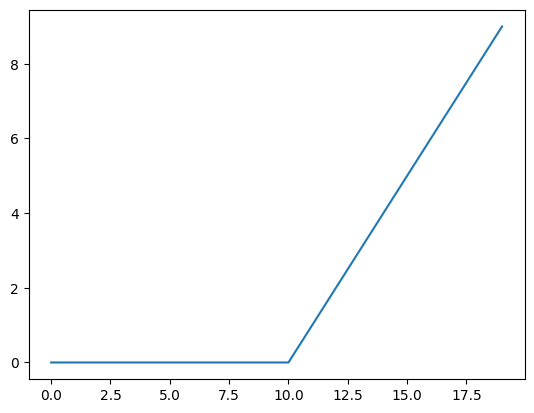

In [ ]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [ ]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

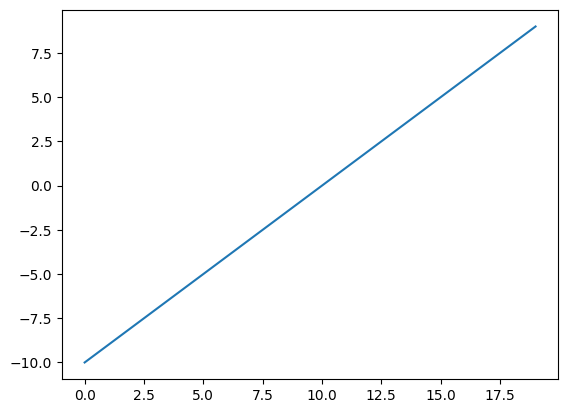

In [ ]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A));

In [ ]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

When we give our neural networks non-linear functions, they are able to find patterns in non-linear data!

## Evaluating and improving our classification model

So far we've been trainnig and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [ ]:
# Check how many examples we have
len(X)

1000

In [ ]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Let's recreate a model to fit on the training data and evluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # raised the learning rate to 0.01
                metrics=['accuracy'])

# 3. Fit the data
history = model_8.fit(X_train, y_train, epochs=25) # decreased the number of times the model will go through the training data

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5102 - loss: 0.7066
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4946 - loss: 0.6914
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5438 - loss: 0.6846 
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5350 - loss: 0.6783
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5402 - loss: 0.6709 
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5698 - loss: 0.6626 
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6141 - loss: 0.6525 
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6131 - loss: 0.6405 
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6211 - loss: 0.6286
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6577 - loss: 0.6157
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6782 - loss: 0.5976 
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.694

Quick review:
* The `loss` function tells the model how wrong the patterns are.
 * Measures the difference between the model's predictions and the actual labels. Quantifies how well a model performs on a dataset.
 * The loss functions provides the optimizer with a metric to minimize.
* The `optimizer` tells our model how it should improve, or how it should update the patterns (weights and biases) it has learned.
 * Algorithms that adjust the model's parameters to minimize the loss fucntion.
 * Optimizers like Stochastic Gradient Descent and Adam iteratively refine the model's parameters.
* The `learning_rate` determines the step size at each iteration through the optimization process.
 * Controls how much the model's parameters should change at each iteration based on the gradient of the loss function.
 * Balances convergence speed and stability, a high learning rate can lead to faster convergence but risks overshooting the optimizal solution (global minimum), while a low learning rate ensure stability but slows training.

Relationship between the loss function, optimizer, and learning rate:
1. **Loss Function** -> **Optimizer**: The optimizer uses the loss function to compute gradients, which guide the parameter updates.
2. **Optimizer** -> **Learning Rate**: The learning rate scales gradients to determine how much to adjust the model's parameters at each step.
3. **Learning Rate** -> **Loss Function**: The learning rate determines how quickly the model minimizes the loss function, with an optimal learning rate leading to steeper decreases while not overshooting the global minimum.



In [ ]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9892 - loss: 0.1051 


[0.1000085100531578, 0.9950000047683716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


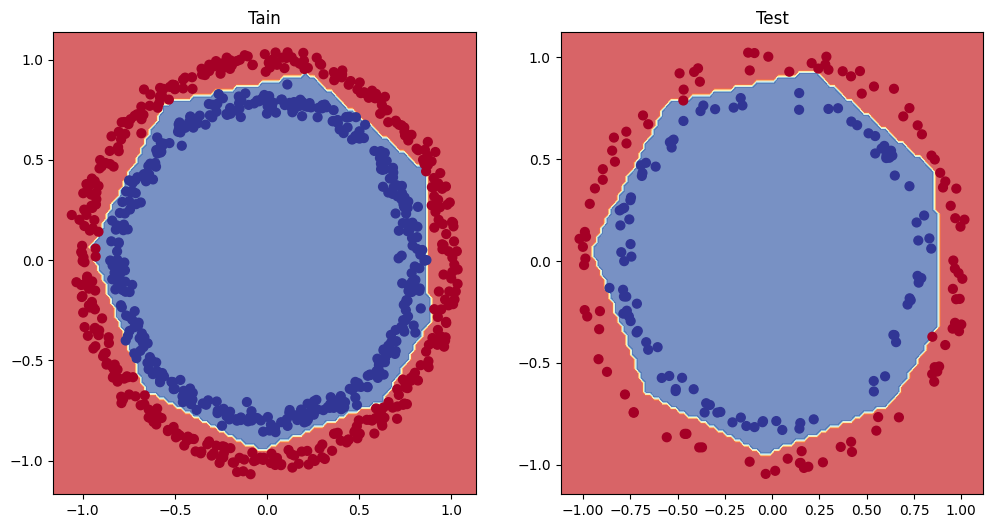

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Tain')
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

## Plot the loss (or training) curves

In [ ]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,accuracy,loss
0,0.51250,0.695809
1,0.54500,0.685203
2,0.55625,0.678440
3,0.55375,0.671710
4,0.57500,0.663778
5,0.61750,0.654221
6,0.64250,0.642599
7,0.63875,0.630319
8,0.65625,0.617172
9,0.68750,0.602755


Text(0.5, 1.0, 'Model_8 loss curves')

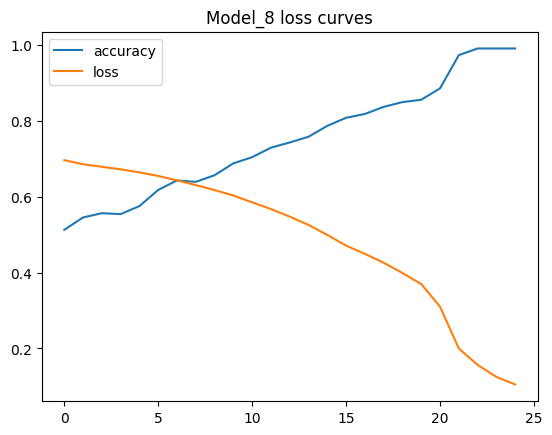

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curves')

🔑 **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality you can add to your model *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here).
* A modified loss curves plot.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_9.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# Create a learning callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5197 - loss: 0.6957 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5200 - loss: 0.6954 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5219 - loss: 0.6951 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5231 - loss: 0.6948 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5187 - loss: 0.6946 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5107 - loss: 0.6942 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5060 - loss: 0.6939 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4994 - loss: 0.6936 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5084 - loss: 0.6932 - learning_

**Code explanation:** `lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))`

`(lambda epoch: 1e-4 * 10**(epoch/20))` - what this is saying is: every epoch traverse a set of learning rate values, starting with *1e-4*, and increasing by 10 to power of the epoch divided by 20 (*10**(epoch/20)*), every epoch.

`tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))` - At the beginning of every epoch, this callback gets the updated learning rate (i.e. *1e-4 * 10**(epoch/20)*) value from `schedule` function provided at `__init__`, with the current epoch and current learning rate, and applies the updated learning rate on the optimizer. ([Link to TensorFlow documentation](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler))
>tf.keras.callbacks.LearningRateScheduler(
    schedule, verbose=0
)

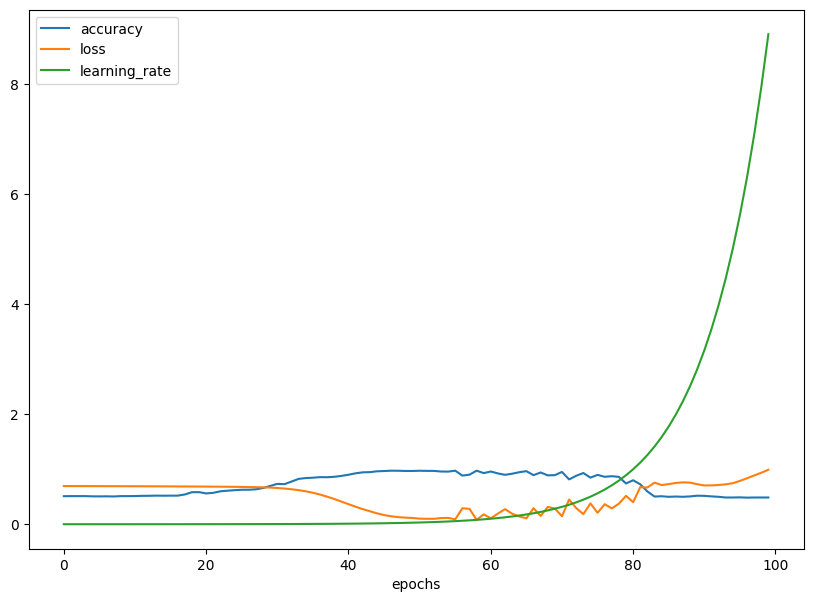

In [ ]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel='epochs');

So we can see that initially nothing happens, and then around epoch 45 the loss starts to decrease and the accuracy starts to increase at what looks like good rates.

So, let's plot the learning rate values during training, plus the loss.

If we return the history_9 for model_9 as a DataFrame we can see that the `lrs` parameter in the below plot is referencing the `learning_rate` column in the DataFrame.

In [ ]:
pd.DataFrame(history_9.history)

,accuracy,loss,learning_rate
0,0.51000,0.694160,0.000100
1,0.51125,0.693888,0.000112
2,0.51125,0.693604,0.000126
3,0.51125,0.693302,0.000141
4,0.50750,0.692983,0.000158
...,...,...,...
95,0.48875,0.787725,5.623413
96,0.48375,0.835939,6.309574
97,0.48625,0.886440,7.079458
98,0.48625,0.936844,7.943282


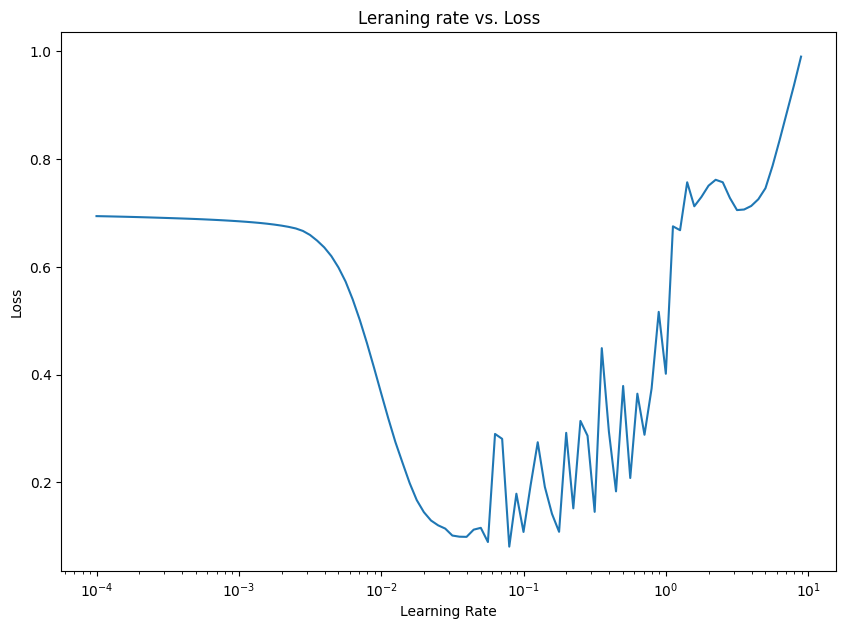

In [ ]:
# Plot the learning rate versus the loss, use 100 as this is the number of epochs we trained the model for
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Leraning rate vs. Loss');

The *rule of thumb* here is to take the learning rate value where the loss is still decreasing, in this case between 1e-2 (0.01) and 1e-1 (0.1), but before it flattens out or starts to flatten out (potentially going up and down which means that it is overshooting the global minimum).

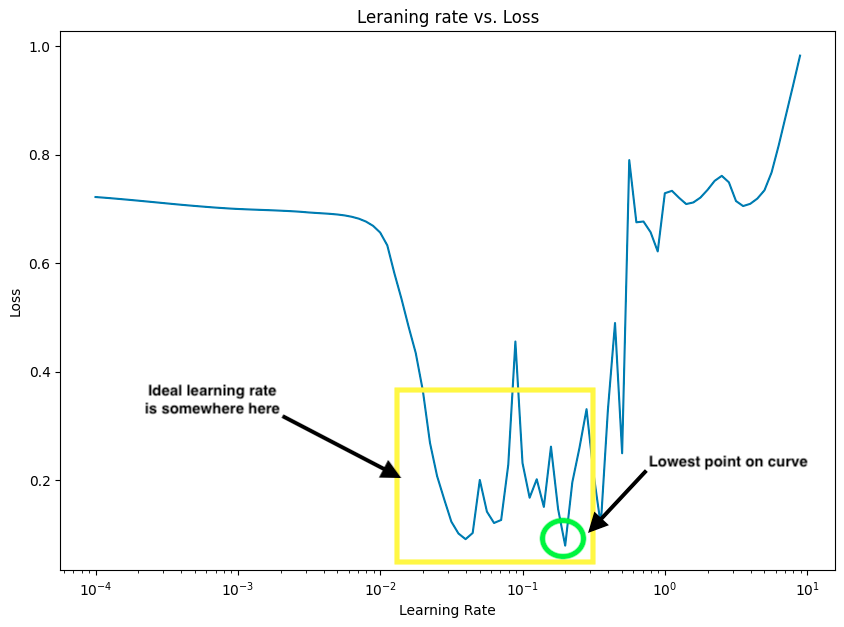

In [ ]:
# Example of other typical earning rate values:
10**0, 10**-1, 10**-2, 10**-3, 10e-4

(1, 0.1, 0.01, 0.001, 0.001)

**Practice:** Based on the learning rate vs. loss curve, recreate model_9 and this time use a learning rate based on the learning rate vs. loss curve above.

In [ ]:
# Practice

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
practice_model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
practice_model_9.compile(loss='binary_crossentropy',
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.015), # testing learning rate of 0.015 (not quite 0.02)
                         metrics=['accuracy'])

# 3. Fit the model
practice_history_9 = practice_model_9.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4674 - loss: 0.6971
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5549 - loss: 0.6863 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6103 - loss: 0.6755
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6518 - loss: 0.6545 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6669 - loss: 0.6186 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7665 - loss: 0.5566 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8308 - loss: 0.4785
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9049 - loss: 0.3909
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9442 - loss: 0.3149 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9649 - loss: 0.2520 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9789 - loss: 0.2027 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - ac

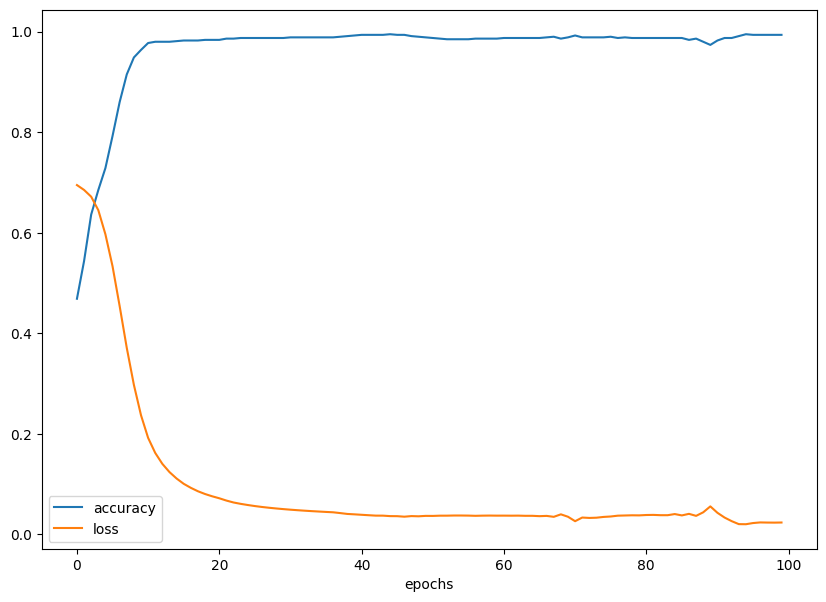

In [ ]:
# Check out the history
pd.DataFrame(practice_history_9.history).plot(figsize=(10, 7), xlabel='epochs');

Back to the video, again try and use the learned learning rate to pick a new learning rate and try to run the model with fewer epochs.

In [ ]:
# Let's try using a higher "ideal" learning rate with the same model as model_9

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model with the ideal learning rate
model_10.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # optimal learning rate was slightly higher than 0.01
                 metrics=['accuracy'])

# 3. Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=50) # need to increase epochs to 50 from video's 20

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4716 - loss: 0.7046
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5329 - loss: 0.6855
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5848 - loss: 0.6726
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6519 - loss: 0.6337
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7431 - loss: 0.5714
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7528 - loss: 0.5149
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8207 - loss: 0.4621
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8591 - loss: 0.4165
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8741 - loss: 0.3815
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8875 - loss: 0.3554
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9020 - loss: 0.3218
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9201 - lo

In [ ]:
# 4. Evaluate model_10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9757 - loss: 0.0589  


[0.058245182037353516, 0.9750000238418579]

In [ ]:
# Evaluate model_8 on the test data
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9892 - loss: 0.1051 


[0.1000085100531578, 0.9950000047683716]

In the video the instructor's mode_10 using the new "ideal" learning rate of 1e-2 with 20 epochs improved more than my model_10 using the same hyperparameters.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


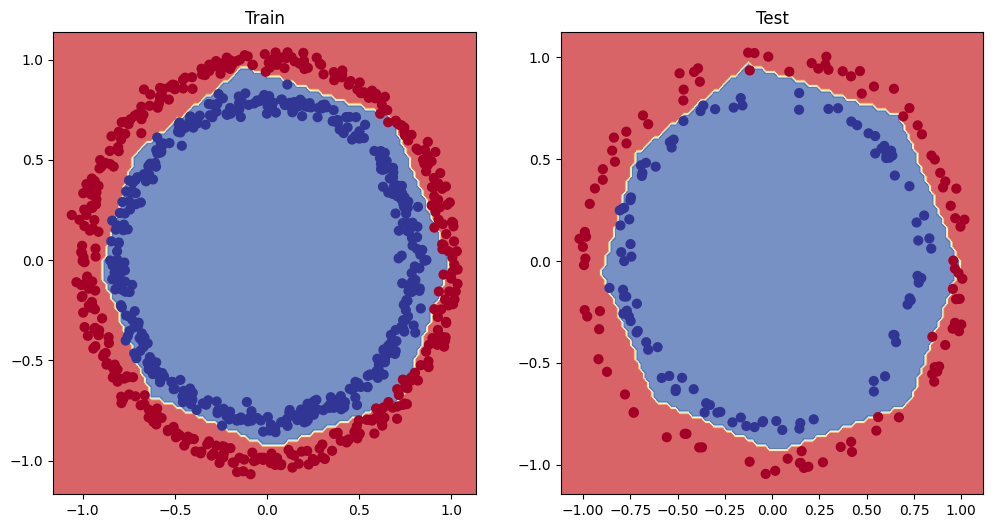

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show();

## **Keynote:** more classification evaluation methods

**key:** tp = True Positive, tn = True Negative, fp = False Position, fn = False Negative

**Metrics**
* **Accuracy**: Default method for classification problems. Not the best for imbalanced classes.
 * Formula: **accuracy** = *tp + tn / tp + tn + fp+ fn*
 * Code: `tf.keras.metrics.Accuracy()` or `sklearn.metrics.accuracy_score()`
* **Precision**: Higher precision leads to less false positives.
 * Formula: **precision** = *tp / tp + fp*
 * Code: `tf.keras.metrics.Precision()` or `sklearn.metrics.precision_score()`
* **Recall**: Higher recall leads to less false negatives.
 * Formula: **recall** = *tp / tp + fn*
 * Code: `tf.keras.metrics.Recall()` or `sklearn.metrics.recall_score()`
* **F1-score**: Combination of precision and recall, usually a good overall metric for a classification model.
 * Formula: **F1-score** = *precision * recall / (precision + recall)*
 * `sklearn.metrics.f1_score()`
* **Confusion matrix**: when comparing predictions to truth labels to see where model gets confused. Can be hard to use with large number of classes.
 * Formula: *N/A*
 * Code: `custom function` or `sklearn.metrics.confusion_matrix()`

**Precision/ Recall Tradeoff**: unfortunately, you can't have both precision and recall high. If you increase precision it will reduce recall, and vice versa.
* **Tradeoff**
  * **Increasing precision**: often involves raising the threshold for classification, which reduces false positives but may increase false negatives, thereby decreasing recall.
  * **Increasing recall**: involves lowering the threshold, which captures more true positives, but also increases false positives, thereby decreasing precision.
  > **Solution**: the F1-score calculates the harmonic mean of precision and recall, giving a balanced measure of both. You can reference this metric to understand if the model is seeing overall improvement (a good balance between precision and recall), or if it can do better (an imbalance between precision and recall).

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods and metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy * 100):.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9757 - loss: 0.0589 
Model loss on the test set: 0.058245182037353516
Model accuracy on the test set: 97.50%


How about a confusion matrix?

A confusion matrix is a structured table used to evaluate the performance of a classification model by comparing actual class labels with predicted class labels.

Interpreting the confusion matrix:
* Diagonal elements: Represent true positives for each class.
* Off-Diagonal Elements: Represent misclassifications or false positives and false negatives.
* Model Performance Metrics: The matrix is used to calculate metrics like precision, recall, accuracy, and F1-score.

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[9.9489474e-01],
       [9.9489474e-01],
       [9.9489474e-01],
       [9.9489474e-01],
       [4.5644581e-02],
       [3.9798324e-06],
       [9.9489474e-01],
       [8.4336072e-08],
       [9.9489474e-01],
       [3.1181567e-04]], dtype=float32)

Oops... looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions.

**prediction probability:** the sigmoid (or softmax) function is outputting a series of probabilities, the closer a y_preds value is to 1 the more the model thinks it's a 1 label, and the closer a y_preds value is to 0 the more the model thinks it's a 0 label.

To solve this you can use the `tf.round()` function to round the y_preds values to their nearest integer value (0 or 1). [Link to TensorFlow tf.math.round() documentation](https://www.tensorflow.org/api_docs/python/tf/math/round)

In [ ]:
# Convert prediction probablities to binary format and view the first 10
tf.round(y_preds[:10])

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create the confusion matrix with the y_preds rounded to their nearest integer value
confusion_matrix(y_test, tf.round(y_preds))

array([[97,  4],
       [ 1, 98]])

How about we prettify our confusion matrix?

In [ ]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix function.
# https://github.com/scikit-learn/scikit-learn/blob/baf828ca1/sklearn/metrics/_plot/confusion_matrix.py#L443
# Possible new function to use is the ConfusionMatrixDisplay.from_predictions: https://scikit-learn.org/0.24/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

Try using the new ConfusionMatrixDisplay.from_predictions before continuing with the video.

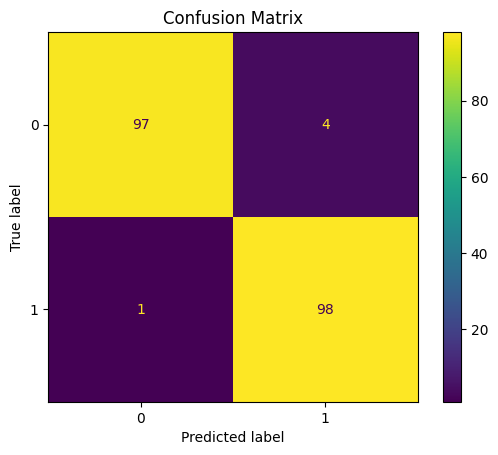

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, tf.round(y_preds))
plt.title('Confusion Matrix')
plt.show();

Okay, that worked! Now back to the video!

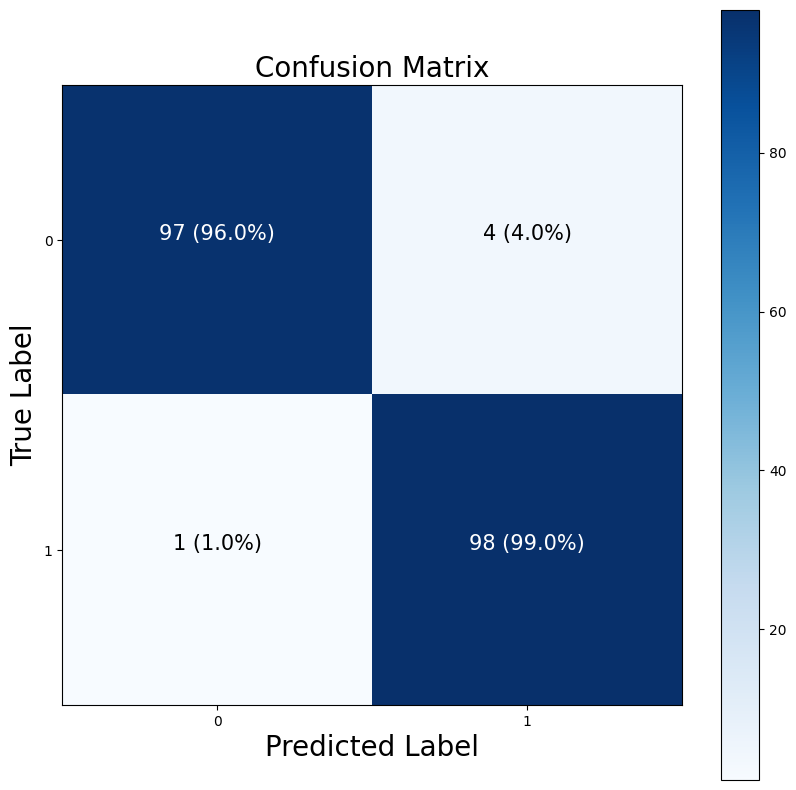

In [ ]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix (percentage values between 0 and 1)
n_classes = cm.shape[0] # get the number of classes

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title='Confusion Matrix',
       xlabel='Predicted Label',
       ylabel='True Label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust the label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
           horizontalalignment='center',
           color='white' if cm[i, j] > threshold else 'black',
           size=15)

**Practice:** Turn the above plot into a function.

In [ ]:
def plot_confusion_matrix(y_test, y_preds):
  figsize = (10, 10)

  # Create the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_preds))
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix (percentage values between 0 and 1)
  n_classes = cm.shape[0] # get the number of classes

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title='Confusion Matrix',
        xlabel='Predicted Label',
        ylabel='True Label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust the label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
            horizontalalignment='center',
            color='white' if cm[i, j] > threshold else 'black',
            size=15)

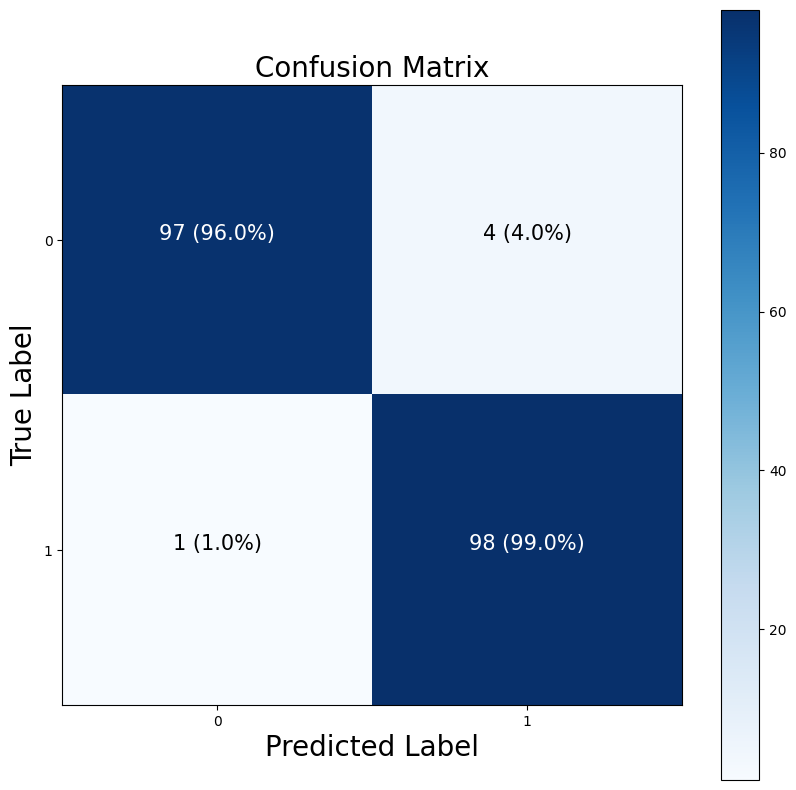

In [ ]:
plot_confusion_matrix(y_test=y_test, y_preds=y_preds)

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing. [TensorFlow fashion_mnist datset](https://www.tensorflow.org/datasets/catalog/fashion_mnist)

**Note:** This is *NOT* multilabel classification because the classifier we're going to build is only going to be trying to assign a single label to each example. It would be multilabel classification if, like a movie, we could assign multiple genres to a movie (e.g. Indian Jones and the Raiders of the Lost Ark could be assigned action, adventure, and romance).

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
# Import the data as tuples (not sure why will look into it)
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Show the first training example
print(f"Training example:\n{train_data[0]}")
print(f"Training label:\n{train_labels[0]}")

Training example:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

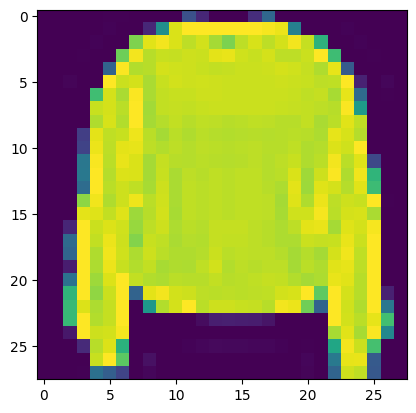

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
# Check out samples label
train_labels[7]

2

In [ ]:
# Create a small list so we can index onto our training labels so they're human-readable.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

Text(0.5, 1.0, 'Coat')

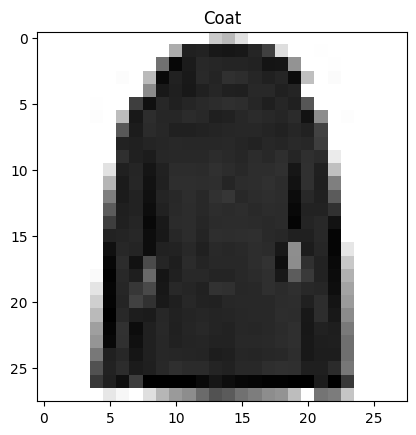

In [ ]:
# Plot an example image and its label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

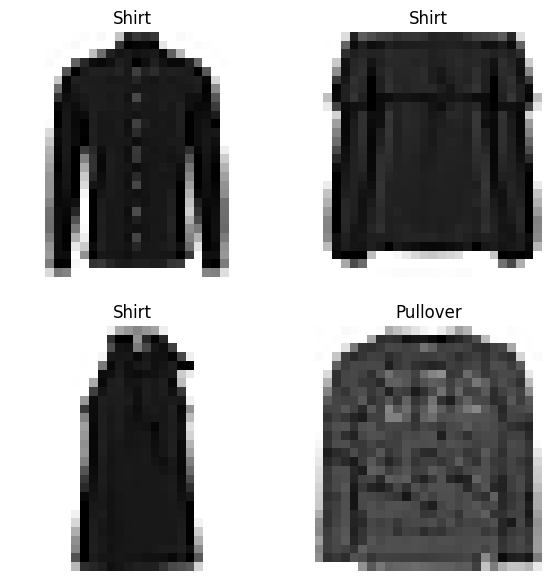

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

Familiarize yourself with the data and ask yourself: Are there any straight lines? Are there any curved lines? How is this related to our models and linearity versus non-linearity.

## Building a multi-class classification model

For our mutli-class classification model, we can use a similar architecture to our binary classificatiers, however, we're going to have to tweak a few things.

Hyperparameters for Multiclass Classification
* Input layer shape: same as number of features (e.g. 5 if features are age, sex, height, weight, smoking, status in heart disease prediction)
 > For fasion MNIST dataset this means **28** because there are 28 features (columns, aka the shape is (28, 28))
* Hidden layers(s): problem specific, minimum = 1, maximum = unlimited
* Neurons per hidden layer: problems specific, generally 10 - 100
* Output layer shape: 1 per class (e.g. 3 for food, person, or dog photo)
 > In this case we'll have **10** neurons in the output layer for `['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']`
* Hidden activation: Usually ReLU (rectified linear unit)
 > In this case ReLU then output as sigmoid or softmax (probably softmax)
* Loss function: Cross entropy (tf.keras.losses.CategoricalCrossentropy in TensorFlow
 > In this case [SparseCategoricalCrossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy) because CategoricalCrossentropy is expects the labels to be provided in a one_hot representation (1, 0, 1, 0, 0). SparseCategoricalCrossentropy takes labels as integers (1, 2, 3, etc.).
* Optimizer: Stochastic Gradient Descent or Adam

In [ ]:
# our data needs to be flattened (28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(None, 784)

In [ ]:
28 * 28

784

The `Flatten()` layer transforms an example from a matrix to one long vector, which is what nerual networks like to work with.

In [ ]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# 3. Fit the model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10))) # normall we pass our cross validation data to validation_data= but in this case we just have test data

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.1710 - loss: 3.0510 - val_accuracy: 0.1908 - val_loss: 2.0404
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1930 - loss: 2.0461 - val_accuracy: 0.2324 - val_loss: 1.9611
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2322 - loss: 1.9509 - val_accuracy: 0.2653 - val_loss: 1.8147
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2657 - loss: 1.7882 - val_accuracy: 0.2741 - val_loss: 1.8043
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2795 - loss: 1.7279 - val_accuracy: 0.3038 - val_loss: 1.6891
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2850 - loss: 1.7176 - val_accuracy: 0.3198 - val_loss: 1.5507
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3177 - loss: 1.5753 - val_accuracy: 0.3231 - val_loss: 1.5516
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3275 - loss: 1.5163 - 

If you run into any ValueErrors or shape related errors, the three areas you want to look at are **input shape**, **output shape**, and the **loss function**!

In [ ]:
# Check the model summary
model_11.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tesnors they try to find patterns in to be between 0 & 1.

In [ ]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# 3. Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5429 - loss: 1.3979 - val_accuracy: 0.7610 - val_loss: 0.8087
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7738 - loss: 0.7563 - val_accuracy: 0.7786 - val_loss: 0.6982
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7879 - loss: 0.6641 - val_accuracy: 0.7867 - val_loss: 0.6518
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7935 - loss: 0.6214 - val_accuracy: 0.7894 - val_loss: 0.6268
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7985 - loss: 0.5953 - val_accuracy: 0.7940 - val_loss: 0.6110
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8036 - loss: 0.5754 - val_accuracy: 0.7972 - val_loss: 0.5978
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8068 - loss: 0.5629 - val_accuracy: 0.8020 - val_loss: 0.5889
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8089 - loss: 0.5546 - 

🔑 **Note:** Neural networks tend to prefer data in numerical form as well as scaled/ normalized (numbers between 0 & 1).

<Axes: title={'center': 'Normalized data'}>

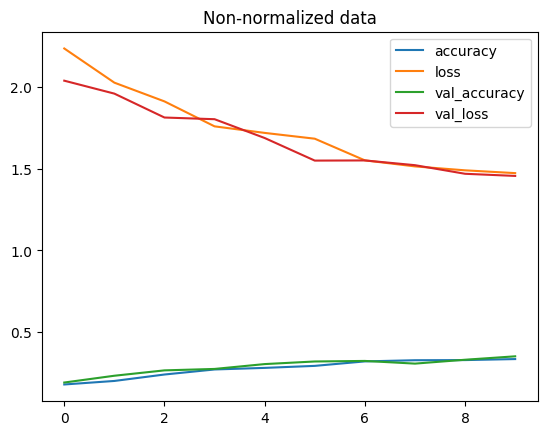

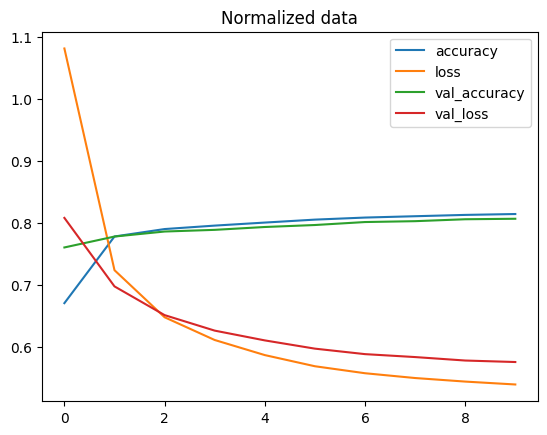

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title='Non-normalized data')
# Plot normalized data loss curve
pd.DataFrame(norm_history.history).plot(title='Normalized data')

🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Compile model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1459 - loss: 2.1901 - val_accuracy: 0.4301 - val_loss: 1.3903 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4711 - loss: 1.3037 - val_accuracy: 0.5138 - val_loss: 1.1477 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5824 - loss: 1.0908 - val_accuracy: 0.6189 - val_loss: 0.9801 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6304 - loss: 0.9608 - val_accuracy: 0.6392 - val_loss: 0.9452 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6549 - loss: 0.9207 - val_accuracy: 0.6509 - val_loss: 0.9230 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6798 - loss: 0.8864 - val_accuracy: 0.6669 - val_loss: 0.8900 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6868 - l

Text(0.5, 1.0, 'Finding the ideal learning rate')

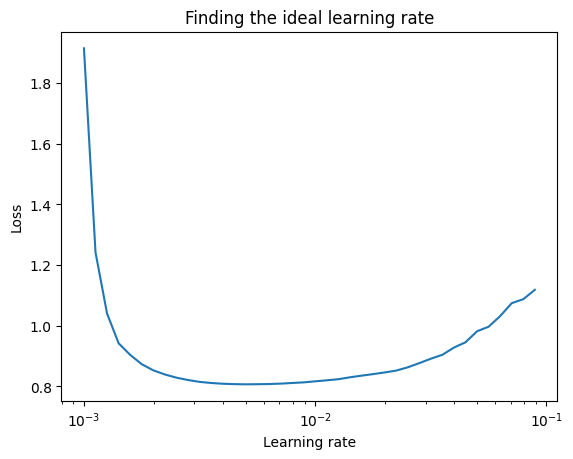

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * 10**(tf.range(40)/20)
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')

In [ ]:
10**-3

0.001

In [ ]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4940 - loss: 1.4445 - val_accuracy: 0.7255 - val_loss: 0.8963
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7353 - loss: 0.8563 - val_accuracy: 0.7404 - val_loss: 0.7795
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7473 - loss: 0.7604 - val_accuracy: 0.7470 - val_loss: 0.7299
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7569 - loss: 0.7085 - val_accuracy: 0.7543 - val_loss: 0.6915
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7631 - loss: 0.6731 - val_accuracy: 0.7596 - val_loss: 0.6715
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7696 - loss: 0.6513 - val_accuracy: 0.7636 - val_loss: 0.6578
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7744 - loss: 0.6359 - val_accuracy: 0.7666 - val_loss: 0.6493
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7778 - loss: 0.6238 -

## Evaluating our multi-class classification model

To evaluate our multi-class classification model:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top 2...

See if you can use TFLOW to get 15% off the actual course.

In [ ]:
# Recreate the confusion matrix function

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix (percentage values between 0 and 1)
  n_classes = cm.shape[0] # get the number of classes

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title='Confusion Matrix',
        xlabel='Predicted Label',
        ylabel='True Label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust the label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
            horizontalalignment='center',
            color='white' if cm[i, j] > threshold else 'black',
            size=text_size)


In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for "prediction probabilities"

# View the first 5 preictions
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[2.9168568e-09, 3.0761852e-18, 2.9098831e-20, 6.1649061e-11,
        4.0589815e-31, 3.7919205e-02, 4.5797150e-16, 3.8866289e-02,
        6.8751589e-04, 9.2252702e-01],
       [1.9334350e-03, 2.1135295e-07, 8.6556596e-01, 4.3986240e-08,
        5.0005135e-03, 1.9041089e-14, 1.2749960e-01, 4.0494911e-19,
        2.2822123e-07, 3.6578698e-32],
       [9.3193794e-06, 9.9849951e-01, 1.2840044e-05, 1.0797542e-03,
        1.6205553e-05, 2.6594775e-04, 7.4869211e-05, 4.1045449e-05,
        5.3189348e-07, 4.8784454e-08],
       [1.4210654e-05, 9.9782079e-01, 1.8720910e-05, 1.6241665e-03,
        2.5776086e-05, 3.3276618e-04, 1.0847750e-04, 5.4066339e-05,
        8.1627758e-07, 7.5084962e-08],
       [8.1643537e-02, 8.4795002e-03, 2.7265209e-01, 3.2107584e-02,
        1.3221854e-01, 8.8335701e-06, 4.7210222e-01, 1.3511874e-07,
        7.8744208e-04, 7.1418175e-13]], dtype=float32)

🔑 **Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([2.9168568e-09, 3.0761852e-18, 2.9098831e-20, 6.1649061e-11,
        4.0589815e-31, 3.7919205e-02, 4.5797150e-16, 3.8866289e-02,
        6.8751589e-04, 9.2252702e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 2, 5, 7])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[738,   1,   8, 120,  11,   1, 114,   0,   7,   0],
       [  3, 939,   1,  34,  21,   0,   2,   0,   0,   0],
       [ 25,   1, 475,  17, 295,   0, 186,   0,   1,   0],
       [ 31,  39,   1, 826,  50,   0,  49,   0,   4,   0],
       [  4,   2,  65,  39, 846,   0,  44,   0,   0,   0],
       [  1,   0,   0,   3,   0, 905,   0,  47,   9,  35],
       [196,   1, 168,  93, 214,   0, 326,   0,   2,   0],
       [  0,   0,   0,   0,   0,  32,   0, 925,   1,  42],
       [ 66,   1,   6,  12,   2,  11,  14,   3, 882,   3],
       [  0,   0,   0,   0,   0,  11,   0,  55,   4, 930]])

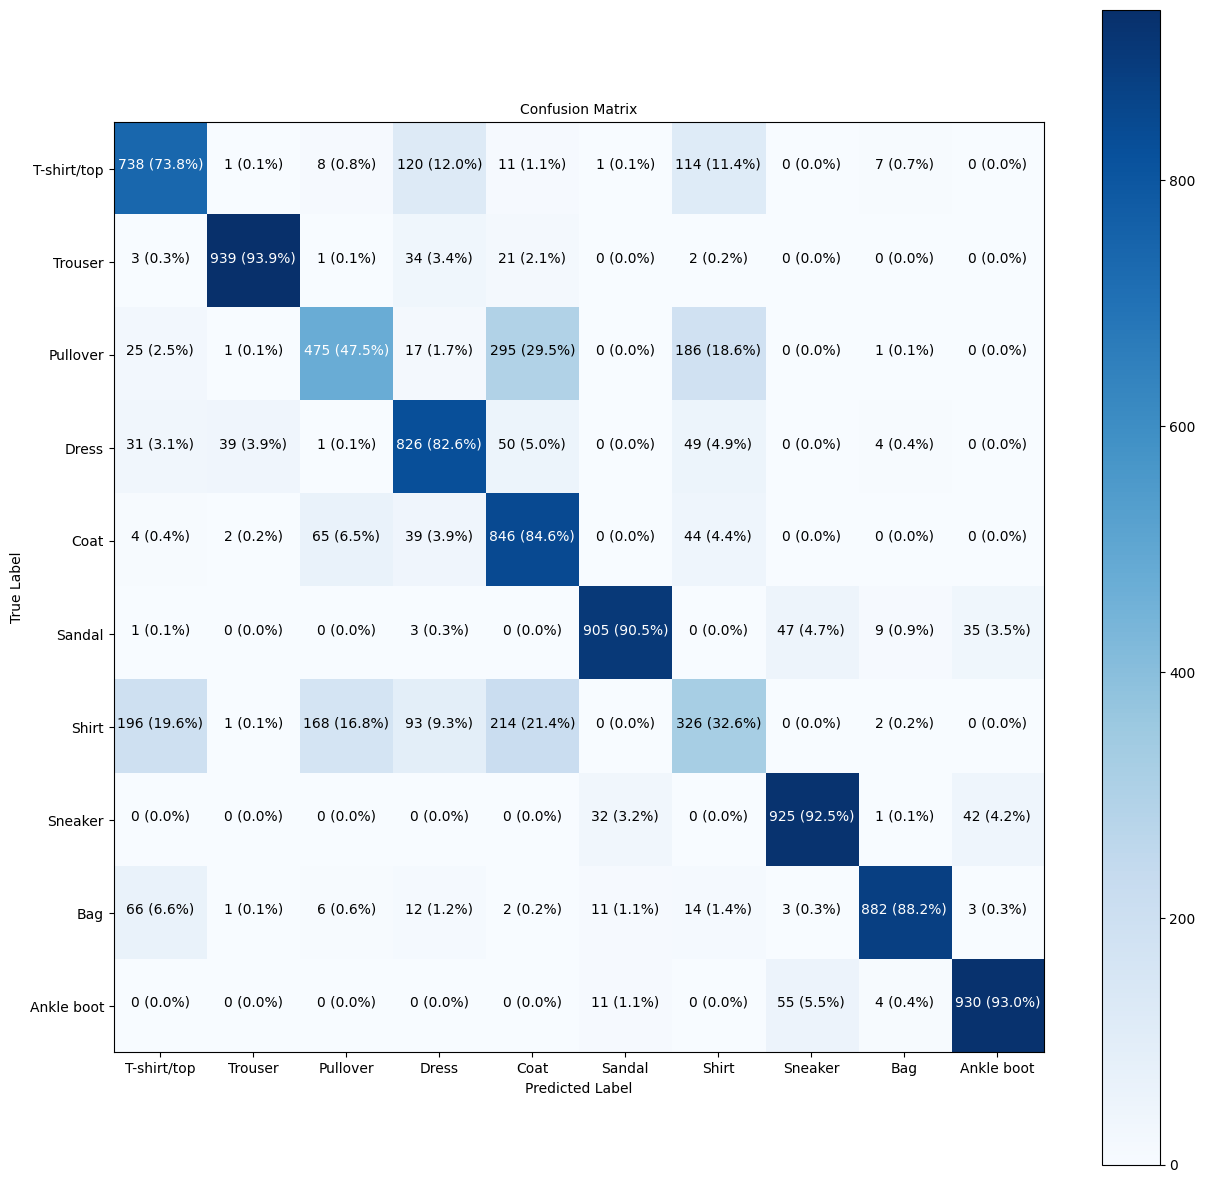

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

🔑 **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible, to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28 , 28)) # 1 = batch size
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Add xlabel information (prediction/true label)
  plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red based on if prediction is right or wrong



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


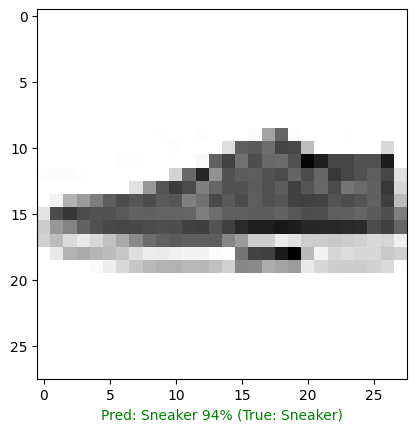

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm, # always make predictions on the same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [ ]:
# Find the layers of our most recent model
model_14.layers

[<Flatten name=flatten_4, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>]

In [ ]:
# Extract a paraticular layer
model_14.layers[1]

<Dense name=dense_9, built=True>

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.23092507, -0.5005949 , -0.35913092, -0.729632  ],
        [-0.33596277,  0.46951148, -0.45884347, -0.27369165],
        [-1.5795233 ,  0.5274923 ,  0.852336  , -1.2891909 ],
        ...,
        [ 0.0601765 ,  0.5158205 , -0.24520636,  0.28782478],
        [ 0.5156785 ,  1.1182419 , -0.9515162 , -1.102144  ],
        [ 0.02433366,  0.13488641,  0.40445295, -1.0291692 ]],
       dtype=float32),
 (784, 4))

In [ ]:
28 * 28

784

In [ ]:
model_14.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

All the weights start off as random numbers, initialized by a Dense layer, and as the model runs it will adjust the weights (and biases).

Now let's check out the bias vector...

In [ ]:
# Bias and baises shapes
biases, biases.shape

(array([-0.13673565,  0.4722283 ,  2.2530692 ,  1.9063212 ], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of tehse is paired with a weights matrix.

The bias vector gets initialized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [ ]:
model_14.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

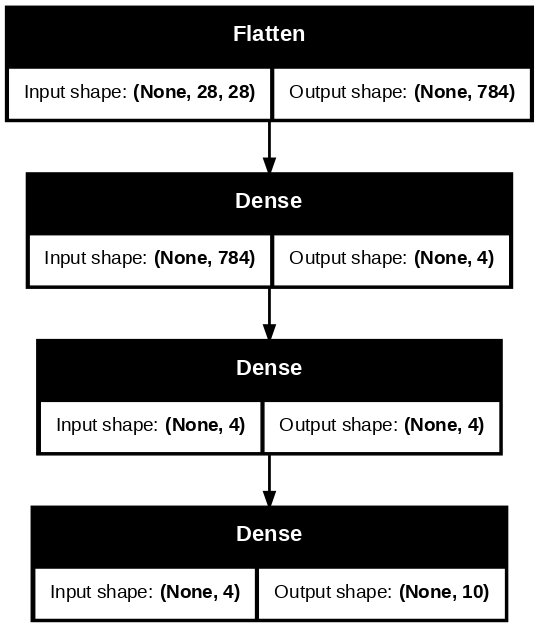

In [ ]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model=model_14, show_shapes=True, dpi=100) # dpi =	Image resolution in dots per inch (size)

# Next: Check out exercises and extra curriculum

### Exercise 2: Replicate the model pictured in the TensorFlow Playground diagram in Tensorflow

Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.

In [ ]:
from sklearn.datasets import make_circles

# Make 100 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# View the first example
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


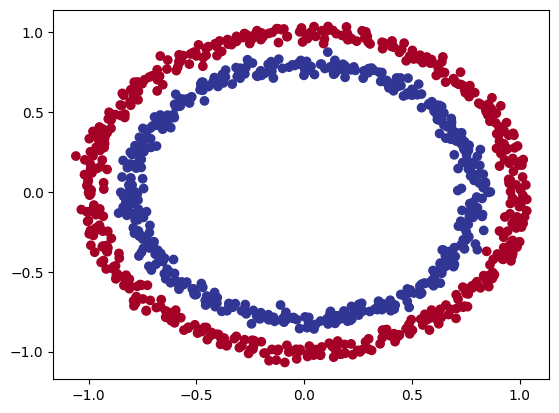

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# Split the data into training and test sets
X_train = X[:800]
y_train = y[:800]
X_test = X[800:]
y_test = y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Make the model
exercise_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
exercise_model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=['accuracy'])

# 3. Create the learning callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# 4. Fit the model
exercise_history_1 = exercise_model_1.fit(X_train,
                                          y_train,
                                          epochs=100,
                                          callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4595 - loss: 0.6933 - learning_rate: 0.0010
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5266 - loss: 0.6930 - learning_rate: 0.0011
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5787 - loss: 0.6926 - learning_rate: 0.0013
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5621 - loss: 0.6924 - learning_rate: 0.0014
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5948 - loss: 0.6915 - learning_rate: 0.0016
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6163 - loss: 0.6903 - learning_rate: 0.0018
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6416 - loss: 0.6881 - learning_rate: 0.0020
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6550 - loss: 0.6849 - learning_rate: 0.0022
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6589 - loss: 0.6790 - learning_rate: 0.0025
Epoch 10/100
25/25 

<Axes: xlabel='epochs'>

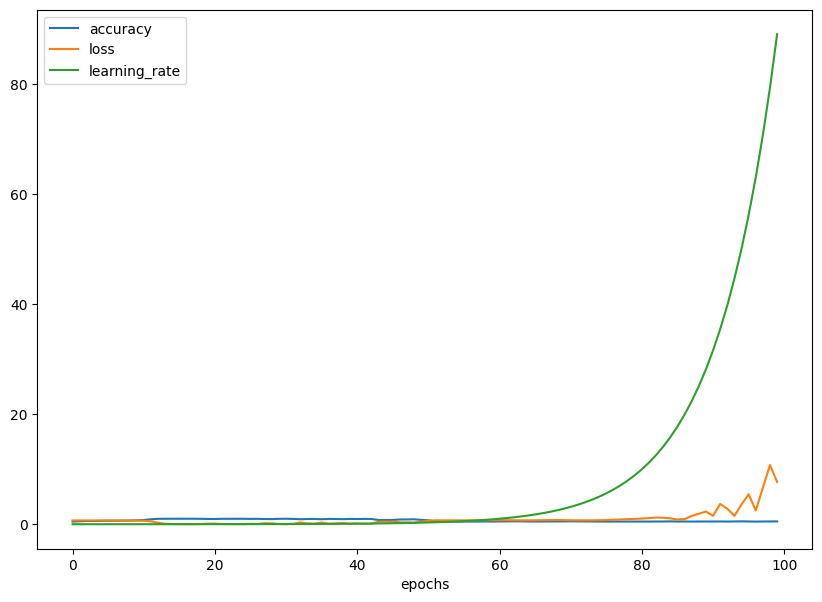

In [ ]:
# Check out the history
pd.DataFrame(exercise_history_1.history).plot(figsize=(10, 7), xlabel='epochs')

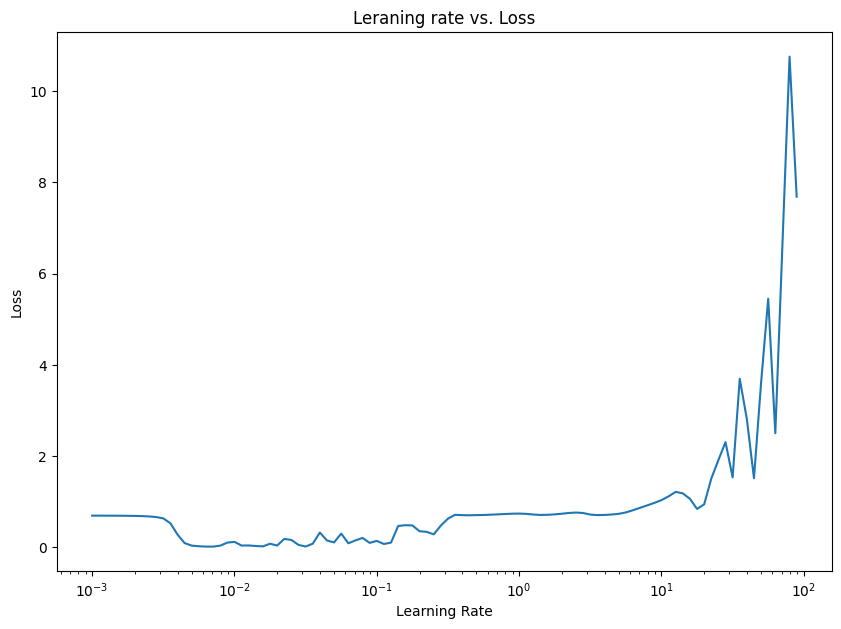

In [ ]:
# Plot the learning rate versus the loss, use 100 as this is the number of epochs we trained the model for
lrs = 1e-3 * (10**(tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, exercise_history_1.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Leraning rate vs. Loss');

In [ ]:
# Get a summary of the model
exercise_model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (32, 6)                     │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (32, 6)                     │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (32, 6)                     │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (32, 6)                     │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (32, 6)                     │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (32, 1)                     │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 581 (2.27 KB)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 388 (1.52 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
doing binary classification


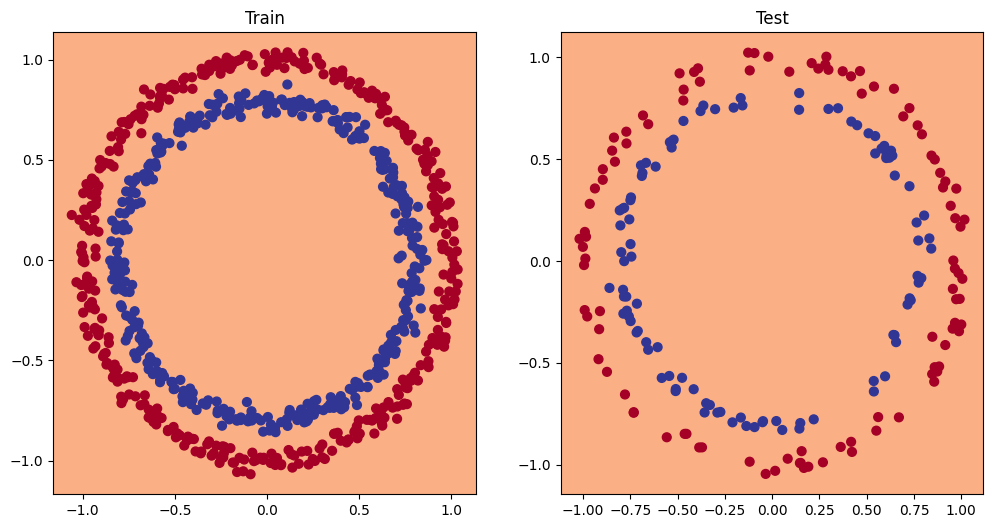

In [ ]:
# Plot the decision boundaries for the training and test sets
import numpy as np

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(exercise_model_1, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(exercise_model_1, X=X_test, y=y_test)
plt.show();

In [ ]:
# Remake the model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
exercise_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
exercise_model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                         metrics=['accuracy'])

# 3. Fit the model
exercise_history_2 = exercise_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5176 - loss: 0.6920
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5700 - loss: 0.6763
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6049 - loss: 0.6455
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6939 - loss: 0.5707
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8382 - loss: 0.4225
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8351 - loss: 0.3932
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8033 - loss: 0.4191
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8614 - loss: 0.3309
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8757 - loss: 0.3183
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8818 - loss: 0.2973
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8774 - loss: 0.3128
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accu

In [ ]:
# Evaluate the model
exercise_model_2.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 9.5898e-04  


[0.0016207199078053236, 1.0]

<Axes: xlabel='epochs'>

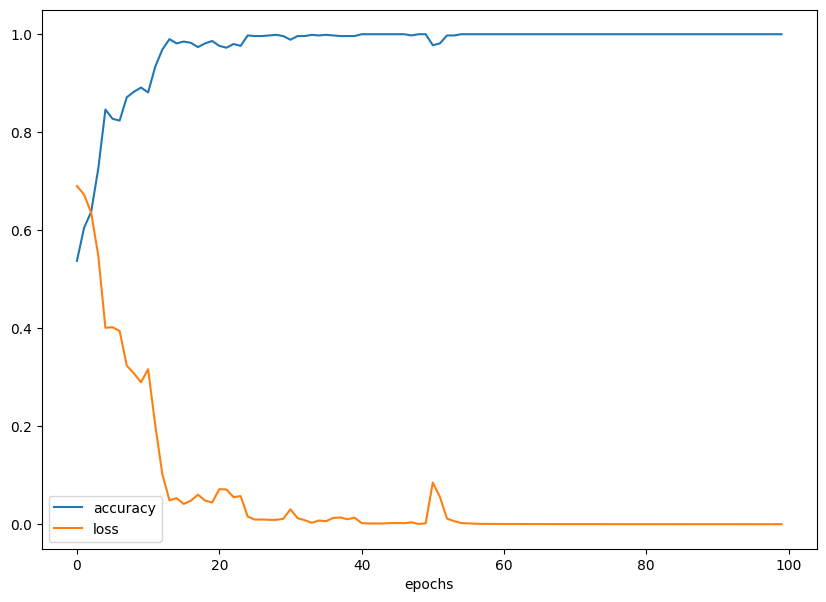

In [ ]:
# View the accuracy and loss curves
pd.DataFrame(exercise_history_2.history).plot(figsize=(10, 7), xlabel='epochs')

Looks like this model with 5 hidden layers and 6 neurons per hidden layer does best at 100 epochs when the learning rate is 0.01 versus the default Adam learning rate of 0.001.

### Exercise 3: Create a classification dataset using Scikit-Learn's make_moons() function

Visualize the data and then build a model to fit it at over 85% accuracy.

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

X[:10], y[:10]

(array([[-0.11166654,  0.52022374],
        [ 1.14264982, -0.34257734],
        [ 0.79555796, -0.01144231],
        [ 0.11182668, -0.55193153],
        [-0.81646618,  0.54399604],
        [ 0.66250998, -0.08435588],
        [ 0.27450961, -0.18990367],
        [-0.11555577,  0.53591195],
        [ 1.57236902, -0.33544711],
        [ 0.76398981,  0.96235883]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

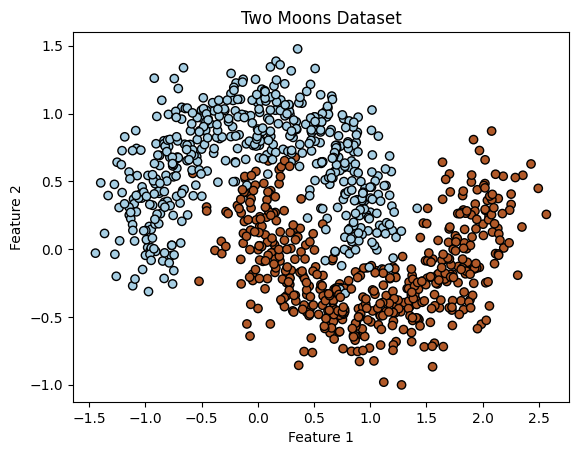

In [ ]:
# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Two Moons Dataset')
plt.show();

In [ ]:
# Split the data into train and test sets
X_train = X[:800]
y_train = y[:800]
X_test = X[800:]
y_test = y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
exercise_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
exercise_model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=['accuracy'])

# Fit the model
exercise_history_3 = exercise_model_3.fit(X_train,
                                          y_train,
                                          epochs=150)

Epoch 1/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5031 - loss: 0.8591
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5058 - loss: 0.8064
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4946 - loss: 0.7639
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5019 - loss: 0.7325
Epoch 5/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4993 - loss: 0.7088
Epoch 6/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5033 - loss: 0.6867
Epoch 7/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4991 - loss: 0.6659
Epoch 8/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5055 - loss: 0.6461
Epoch 9/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5249 - loss: 0.6265
Epoch 10/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5713 - loss: 0.6072
Epoch 11/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6690 - loss: 0.5885
Epoch 12/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

In [ ]:
# Evaluate the model
exercise_model_3.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9561 - loss: 0.1488  


[0.15095996856689453, 0.9549999833106995]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
doing binary classification


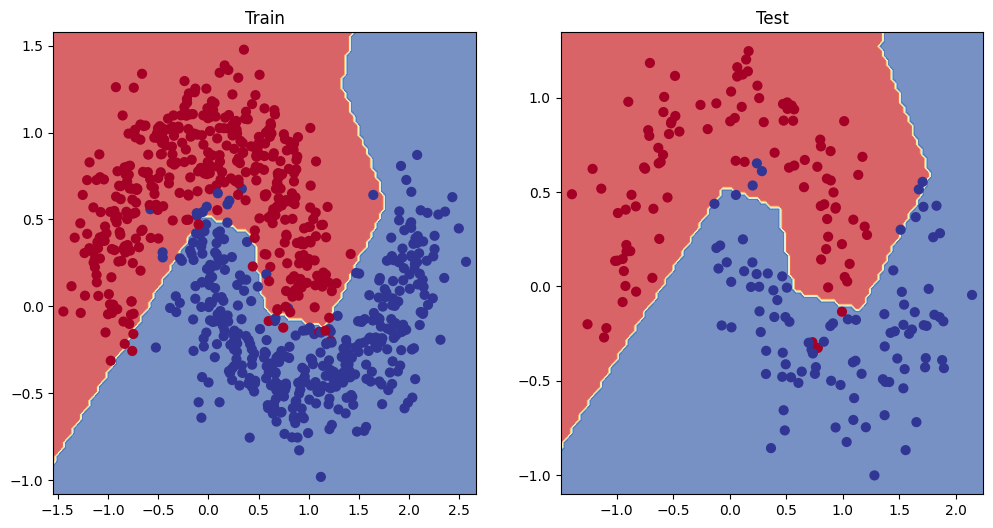

In [ ]:
# Plot the decision boundaries for the training and test sets

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(exercise_model_3, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(exercise_model_3, X=X_test, y=y_test)
plt.show();

### Exercise 6: Train a model to 88% accuracy

Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [ ]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(tf.__version__)

2.18.0


In [ ]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

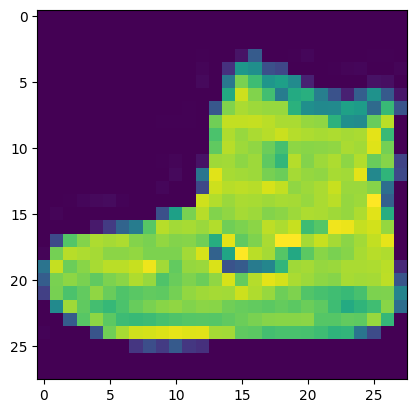

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [ ]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

In [ ]:
# Scale values of the image data so it's between 0 and 1
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

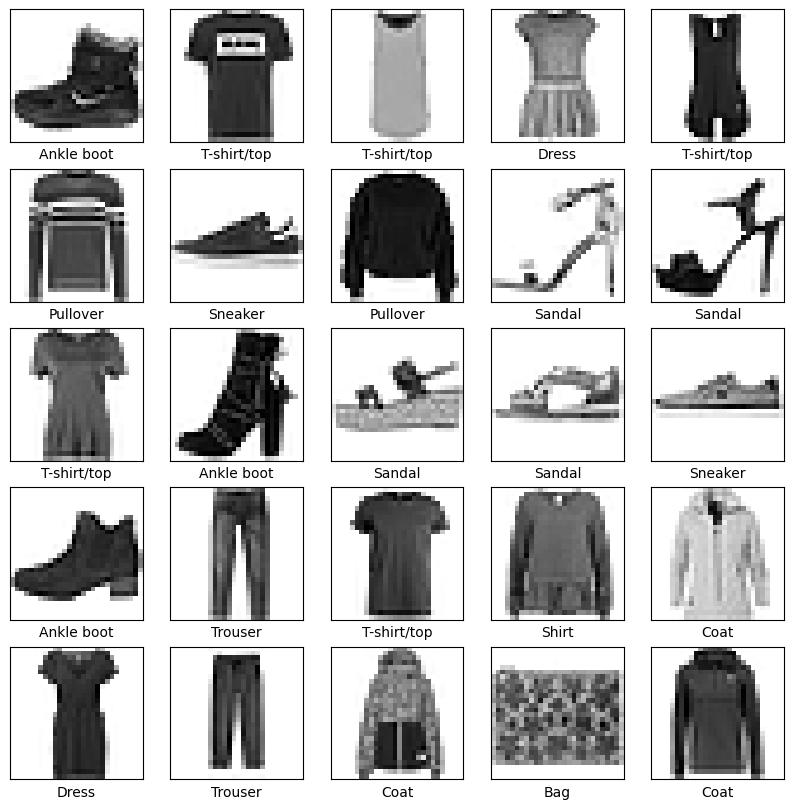

In [ ]:
# Let's visualize multiple images

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data_norm[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
exercise_model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
exercise_model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=['accuracy'])

# Fit the model
exercise_history_4 = exercise_model_4.fit(train_data_norm,
                                          train_labels,
                                          epochs=25)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7680 - loss: 0.6675
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8603 - loss: 0.3950
Epoch 3/25
 301/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8694 - loss: 0.3598

KeyboardInterrupt: 

In [ ]:
# Evaluate the model
exercise_model_4.evaluate(test_data_norm, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8705 - loss: 0.4305


[0.43446123600006104, 0.871399998664856]

In [ ]:
y_probs = exercise_model_4.predict(test_data_norm)
y_probs[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([3.8057430e-12, 3.1643819e-09, 1.1305963e-12, 3.6388064e-13,
       3.2951985e-12, 4.1050365e-07, 2.8315414e-11, 6.8391743e-04,
       3.3101320e-17, 9.9931556e-01], dtype=float32)

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([3.8057430e-12, 3.1643819e-09, 1.1305963e-12, 3.6388064e-13,
        3.2951985e-12, 4.1050365e-07, 2.8315414e-11, 6.8391743e-04,
        3.3101320e-17, 9.9931556e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

Now try running the same model using a GPU.

In [ ]:
# Before running on a GPU, let's see what processing unit we're currently running
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
# check out details of GPU that you're using
!nvidia-smi

Wed Feb 12 23:54:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   58C    P0             29W /   70W |     630MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

🔑 **Note:** If you have access to a CUDA-enabled GPU (as we do in Colab), TensorFlow will automatically use it whenever possible.

In [ ]:
# Recreate the same model as above (model_4) but this time run using a GPU instead of the default CPU

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
exercise_model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
exercise_model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=['accuracy'])

# 3. Fit the model
exercise_history_5 = exercise_model_5.fit(tf.expand_dims(train_data_norm, axis=-1), # after TensorFlow 2.7 may need to expand_dims when fitting training data
                                          train_labels,
                                          epochs=25)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7609 - loss: 0.6998
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8595 - loss: 0.3999
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8704 - loss: 0.3547
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8796 - loss: 0.3296
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8857 - loss: 0.3100
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8908 - loss: 0.2962
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8940 - loss: 0.2844
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8986 - loss: 0.2740
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9011 - loss: 0.2652
Epoch 10/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9042 - loss: 0.2559
Epoch 11/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9064 - loss: 0.2504
Epoch 12/25
1875/1875 ━━━━━━

In [ ]:
# Let's evaluate the model
exercise_model_5.evaluate(test_data_norm, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8629 - loss: 0.4766


[0.46527132391929626, 0.8651999831199646]

So the version of the model that I ran on the GPU completed training in about half the time, and it did *BETTER* on the training data but *WORSE* on the test data than the model that I ran on the CPU!

In [ ]:
# Get predicted probabilities of first two prediction tensors
y_probs = exercise_model_5.predict(test_data_norm)
y_probs[:2]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.3781083e-20, 3.0120875e-12, 8.0280455e-21, 1.5540735e-18,
        1.7409991e-24, 7.9407911e-08, 6.2923902e-16, 4.1480870e-03,
        8.4237912e-13, 9.9585187e-01],
       [1.2555314e-06, 3.7201744e-20, 9.9999142e-01, 2.3805671e-12,
        1.3607431e-06, 1.5949338e-26, 6.0138163e-06, 1.0300480e-29,
        1.6782621e-18, 1.2672559e-22]], dtype=float32)

In [ ]:
# Get sum of all values in first two tensors
y_probs[0].sum(), y_probs[1].sum()

(1.0, 1.0)

In [ ]:
# Get the highest values and class integers for the first two tensors
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])], y_probs[1], tf.argmax(y_probs[1]), class_names[tf.argmax(y_probs[1])]

(array([1.3781083e-20, 3.0120875e-12, 8.0280455e-21, 1.5540735e-18,
        1.7409991e-24, 7.9407911e-08, 6.2923902e-16, 4.1480870e-03,
        8.4237912e-13, 9.9585187e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot',
 array([1.2555314e-06, 3.7201744e-20, 9.9999142e-01, 2.3805671e-12,
        1.3607431e-06, 1.5949338e-26, 6.0138163e-06, 1.0300480e-29,
        1.6782621e-18, 1.2672559e-22], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=2>,
 'Pullover')

In [ ]:
# Convert all prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View first two prediction labels
y_preds[:2]

array([9, 2])

In [ ]:
# Check if first two predictsions are correct
print(f'First prediction index: {y_preds[0]}')
print(f'First label index: {test_labels[0]}')
print(f'First prediction label: {class_names[y_preds[0]]}; first prediction label: {class_names[test_labels[0]]}\n')
print(f'First prediction index: {y_preds[1]}')
print(f'First label index: {test_labels[1]}')
print(f'First prediction label: {class_names[y_preds[1]]}; first prediction label: {class_names[test_labels[1]]}\n')

First prediction index: 9
First label index: 9
First prediction label: Ankle boot; first prediction label: Ankle boot

First prediction index: 2
First label index: 2
First prediction label: Pullover; first prediction label: Pullover



### Exercise 4: Visualizing the fashion MNIST dataset

Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the [classifcation tutorial in the TensorFlow documentation](https://www.tensorflow.org/tutorials/keras/classification) for ideas.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_predictions(model, test_images, test_labels, class_names, num_images=10):
    """
    Displays `num_images` from the test set with the model's predictions.
    Under each image, it shows the predicted class and whether the prediction is correct.

    Parameters:
    model: Trained classification model.
    test_images: Test dataset images.
    test_labels: True labels for test images.
    class_names: List of class names corresponding to labels.
    num_images: Number of images to display (default is 10).
    """
    plt.figure(figsize=(10, 5))

    for i in range(num_images):
        img = test_images[i]
        true_label = test_labels[i]

        # Get model prediction
        prediction = model.predict(np.expand_dims(img, axis=0))
        predicted_label = np.argmax(prediction)

        # Check if the prediction is correct
        is_correct = predicted_label == true_label
        color = 'green' if is_correct else 'red'

        plt.subplot(2, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img, cmap=plt.cm.binary)

        # Display prediction result
        label_text = f"Pred: {class_names[predicted_label]}\n({'Correct' if is_correct else 'Wrong'})"
        plt.xlabel(label_text, color=color)

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


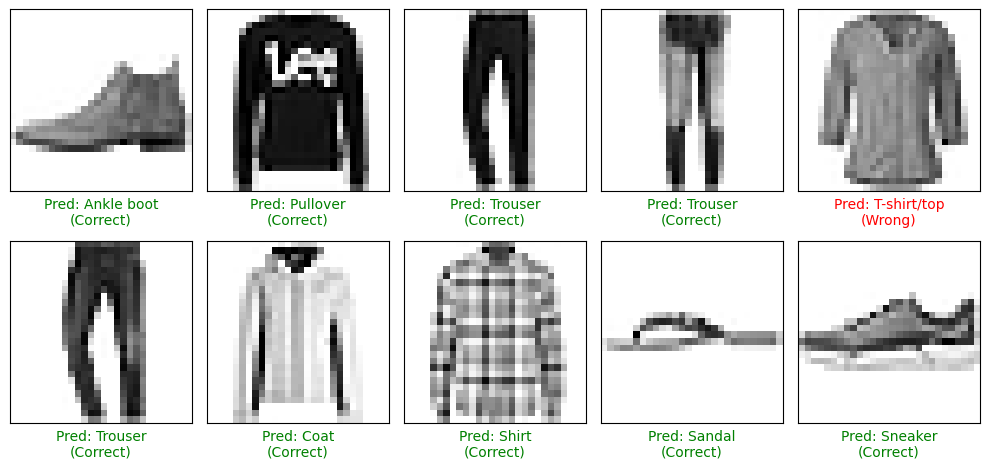

In [ ]:
plot_predictions(model=exercise_model_4,
                 test_images=test_data_norm,
                 test_labels=test_labels,
                 class_names=class_names,
                 num_images=10)

### Recreate the `softmax` function

Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

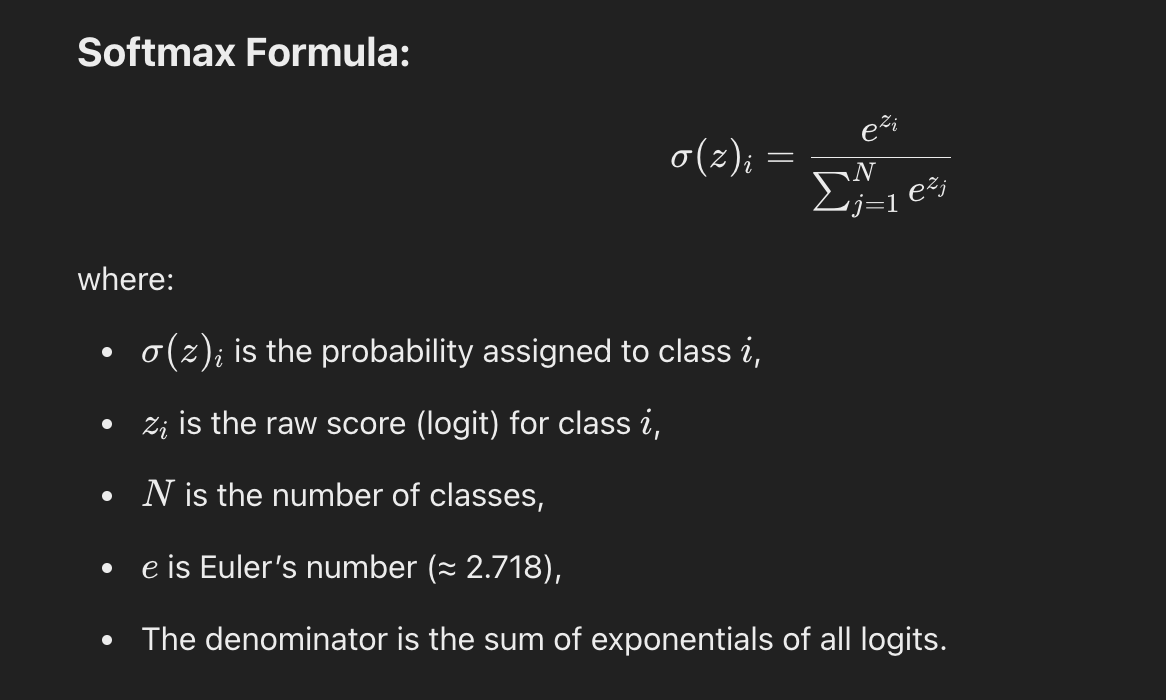

Softmax explained in greater detail:

1. Exponential function: the top part, 'e' to the power of 'z' of 'i'.
* Ensures all values are positive
* Amplifies the difference between logits, making larger values more dominant
2. Summation in the denominator: bottom part
* Calculate the total sum of exponentials for all classes
* Acts as normalization factor, ensuring the final output values sum to 1
3. Division
* Each exponential scored is divided by the total sum
* This converts raw scores into a probability distribution

In [ ]:
def exercise_softmax(tensor):
    """Compute softmax values for each set of scores in tensor."""
    exp_tensor = tf.exp(tensor - tf.reduce_max(tensor))  # Subtract max for numerical stability
    return exp_tensor / tf.reduce_sum(exp_tensor, axis=-1, keepdims=True)

In [ ]:
logits = tf.constant([2.0, 1.0, 0.1])
softmax_output = exercise_softmax(logits)
print(softmax_output.numpy())  # Convert to NumPy array for readability

[0.6590012 0.242433  0.0985659]


### Exercise 7: Show multiple examples from one class

Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

In [ ]:
def plot_predictions_for_class(model, test_images, test_labels, class_label, class_index, num_images=10):
    """
    Displays `num_images` of a specific class from the test set with the model's predictions.
    Under each image, it shows the predicted class and whether the prediction is correct.

    Parameters:
    model: Trained classification model.
    test_images: Test dataset images.
    test_labels: True labels for test images.
    class_label: The name of the class to filter.
    class_index: The index of the class to filter.
    num_images: Number of images to display (default is 10).
    """

    filtered_indices = [i for i, label in enumerate(test_labels) if label == class_index]
    filtered_images = [test_images[i] for i in filtered_indices][:num_images]
    filtered_labels = [test_labels[i] for i in filtered_indices][:num_images]

    plt.figure(figsize=(10, 5))

    for i, img in enumerate(filtered_images):
        true_label = filtered_labels[i]

        # Get model prediction
        prediction = model.predict(np.expand_dims(img, axis=0))
        predicted_label = np.argmax(prediction)

        # Check if the prediction is correct
        is_correct = predicted_label == true_label
        color = 'green' if is_correct else 'red'

        plt.subplot(2, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img, cmap=plt.cm.binary)

        # Display prediction result
        label_text = f"Pred: {class_label}\n({'Correct' if is_correct else 'Wrong'})"
        plt.xlabel(label_text, color=color)

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


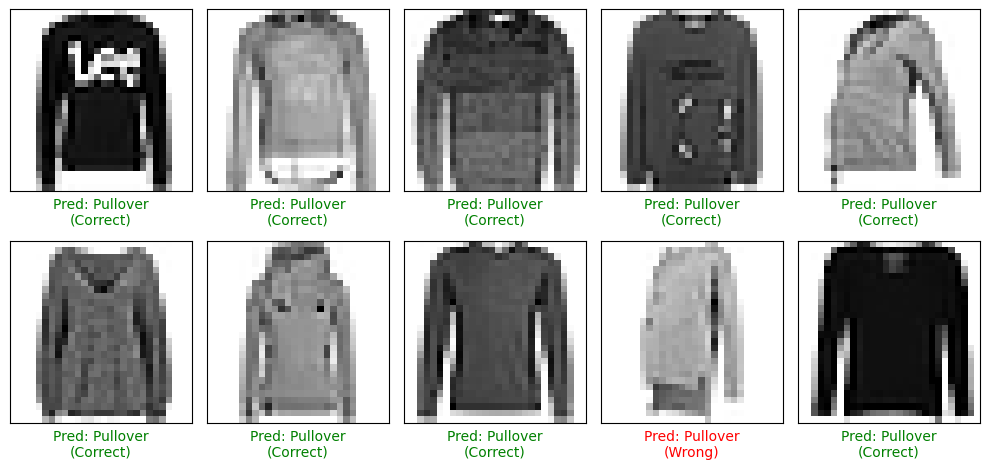

In [ ]:
plot_predictions_for_class(model=exercise_model_4,
                           test_images=test_data_norm,
                           test_labels=test_labels,
                           class_label='Pullover',
                           class_index=2,
                           num_images=10)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(test_labels, tf.round(y_preds), labels=class_names)
plt.title('Confusion Matrix')
plt.show();

ValueError: At least one label specified must be in y_true

In [ ]:
# Recreate the confusion matrix function

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix (percentage values between 0 and 1)
  n_classes = cm.shape[0] # get the number of classes

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title='Confusion Matrix',
        xlabel='Predicted Label',
        ylabel='True Label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust the label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
            horizontalalignment='center',
            color='white' if cm[i, j] > threshold else 'black',
            size=text_size)


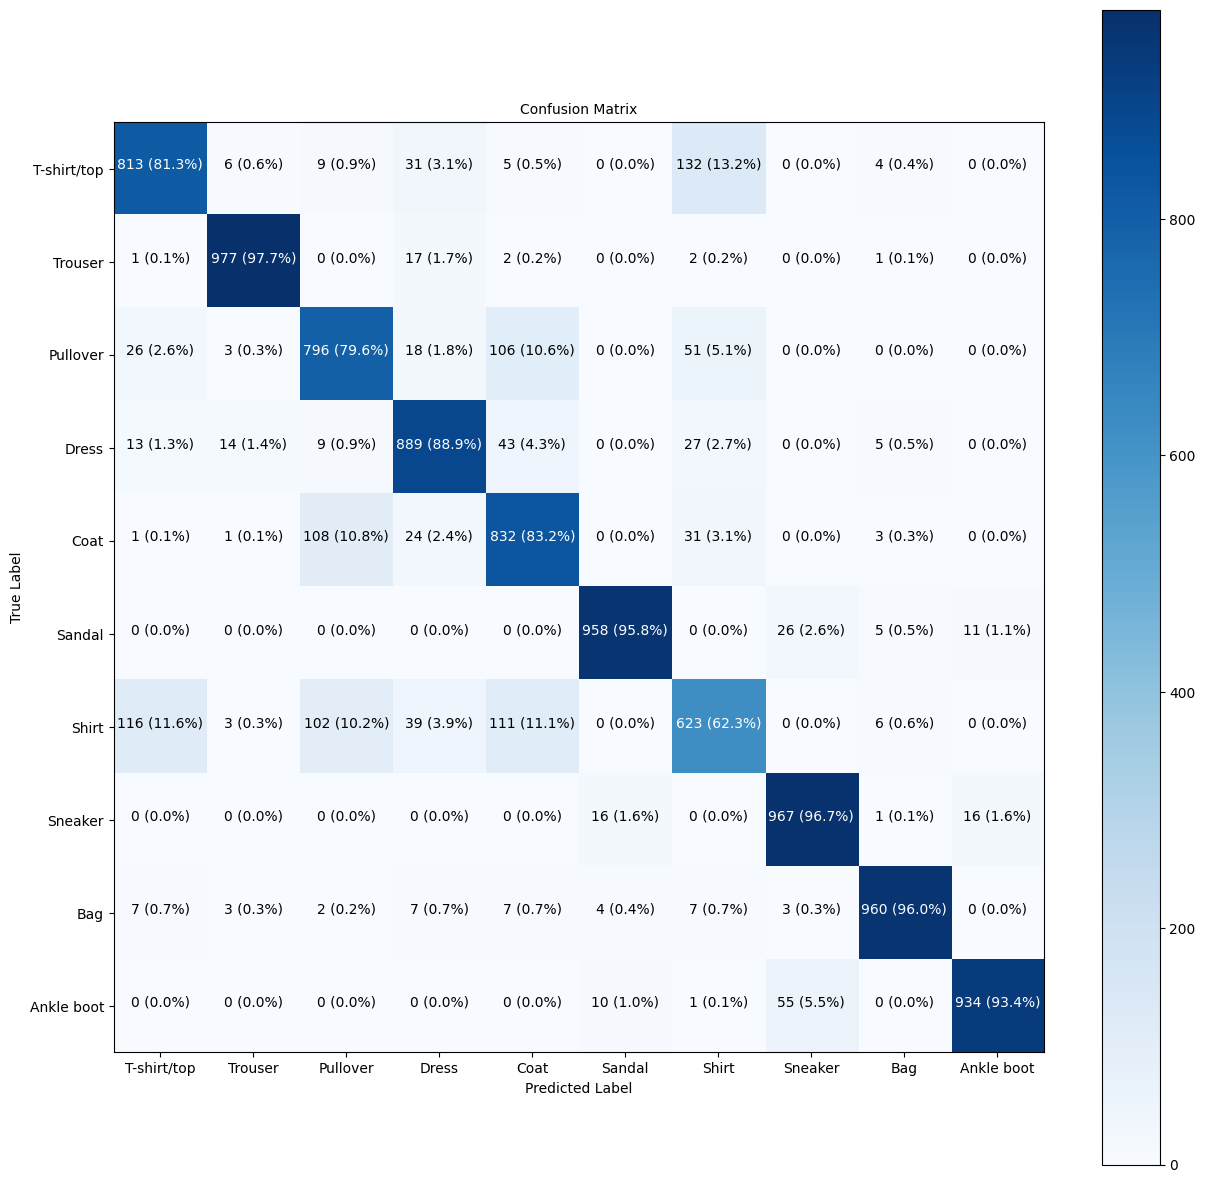

In [ ]:
make_confusion_matrix(test_labels, y_preds, classes=class_names, figsize=(15, 15), text_size=10)